
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 400.  Construct portfolios from the 400 stocks in the S&P 400 mid cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp400-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,AA,Alcoa,US Stocks:Materials,-98.21,106.35,94.52,33.91,16.32,68.66,60.47,74.61,33.91,0.45
1,ACC,American Campus Communities,US Stocks:Real Estate,700.02,152.69,47.17,15.81,10.11,46.92,8.64,32.10,15.81,0.49
2,ACHC,Acadia Healthcare,US Stocks:Healthcare,89.57,170.32,9.36,28.76,9.56,44.77,33.08,44.36,28.76,0.65
3,ACIW,ACI Worldwide,US Stocks:Technology,-81.22,-47.34,-29.77,-6.57,5.69,35.59,24.55,31.80,-6.57,-208.93
4,ACM,AECOM,US Stocks:Industrials,-51.41,20.67,7.97,29.10,16.83,26.39,18.95,33.72,29.10,0.86
5,ADNT,Adient,US Stocks:Consumer Discretionary,-63.90,-63.60,-30.35,11.97,-12.82,62.07,39.54,72.39,11.97,0.17
6,AEO,American Eagle Outfitters,US Stocks:Consumer Discretionary,-77.73,-71.95,-58.41,-10.54,4.78,53.73,39.31,49.59,-10.54,-522.68
7,AFG,American Financial Group,US Stocks:Financials,-3.19,66.94,43.34,24.52,17.46,20.12,13.63,27.89,24.52,0.88
8,AGCO,AGCO,US Stocks:Industrials,-42.04,74.64,-9.44,25.57,19.39,32.65,23.34,34.10,25.57,0.75
9,AIRC,Apartment Income REIT,US Stocks:Real Estate,65.70,19.25,19.04,19.04,19.04,26.91,11.47,17.05,19.04,1.12


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
383,WTRG,Essential Utilities,US Stocks:Utilities,0.50,5.59,3.42,10.60,10.36,25.52,13.80,22.06,10.60,0.48
196,LSCC,Lattice Semiconductor,US Stocks:Technology,-94.81,-40.79,-13.74,52.32,47.17,50.55,36.57,42.06,52.32,1.24
234,NSA,National Storage Affiliates Trust,US Stocks:Real Estate,91.81,16.56,44.63,35.10,24.59,28.42,13.68,22.84,35.10,1.54
292,RS,Reliance Steel & Aluminum Co.,US Stocks:Materials,-10.01,166.02,23.89,31.98,22.72,25.59,14.93,28.39,31.98,1.13
48,CAR,Avis Budget Group,US Stocks:Industrials,260.68,739.90,258.04,101.03,58.95,81.60,41.01,79.85,101.03,1.27
252,OPCH,Option Care Health,US Stocks:Healthcare,81.29,156.22,42.84,55.66,35.81,36.02,24.20,54.84,55.66,1.01
178,KNSL,Kinsale Capital Group,US Stocks:Financials,37.87,132.76,33.65,48.28,47.60,26.01,12.71,40.25,48.28,1.20
290,RRC,Range Resources,US Stocks:Energy,121.86,780.26,243.71,46.56,2.48,49.07,21.47,111.65,46.56,0.42
83,DAR,Darling Ingredients,US Stocks:Consumer Staples,28.75,160.05,10.85,54.91,39.76,41.22,24.10,38.47,54.91,1.43
222,MUSA,Murphy USA,US Stocks:Consumer Discretionary,2152.63,171.64,72.27,43.95,28.53,25.31,6.49,36.89,43.95,1.19


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,WTRG,LSCC,NSA,RS,CAR,OPCH,KNSL,RRC,DAR,MUSA,TGNA,Ranked Portfolio
Annual Returns,10.60,52.32,35.10,31.98,101.03,55.66,48.28,46.56,54.91,43.95,14.69,34.01
Std Dev,22.06,42.06,22.84,28.39,79.85,54.84,40.25,111.65,38.47,36.89,29.59,28.08
Sharpe Ratio,0.48,1.24,1.54,1.13,1.27,1.01,1.20,0.42,1.43,1.19,0.50,1.21
Weight,0.08,0.03,0.08,0.07,0.03,0.05,0.09,0.05,0.05,0.17,0.31,1.00
Worst Typical Down Year,-33.52,-31.80,-10.58,-24.80,-58.67,-54.02,-32.22,-176.74,-22.03,-29.83,-44.49,-22.14
Black Swan,-55.58,-73.86,-33.42,-53.19,-138.52,-108.86,-72.47,-288.39,-60.50,-66.72,-74.08,-50.22


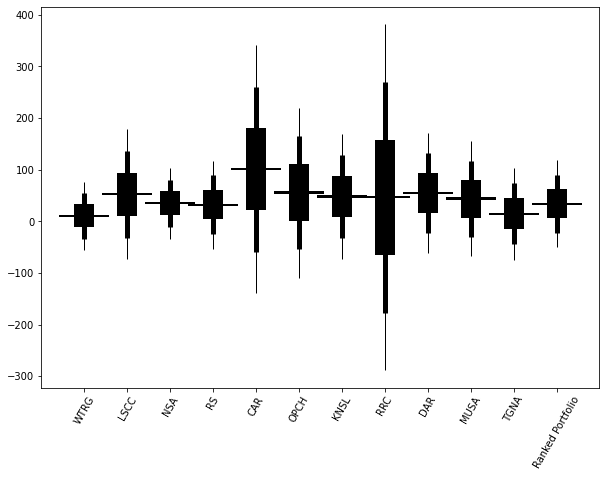

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

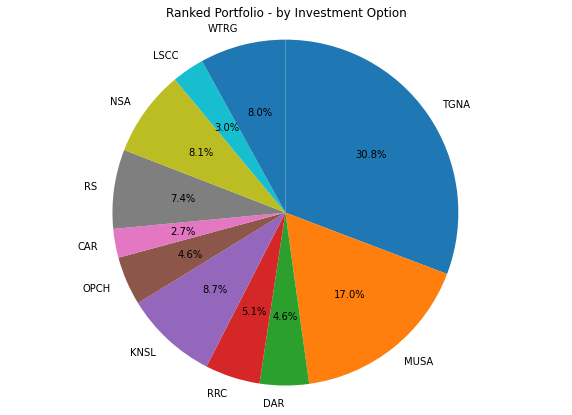

TGNA   0.31
MUSA   0.17
DAR    0.05
RRC    0.05
KNSL   0.09
OPCH   0.05
CAR    0.03
RS     0.07
NSA    0.08
LSCC   0.03
WTRG   0.08



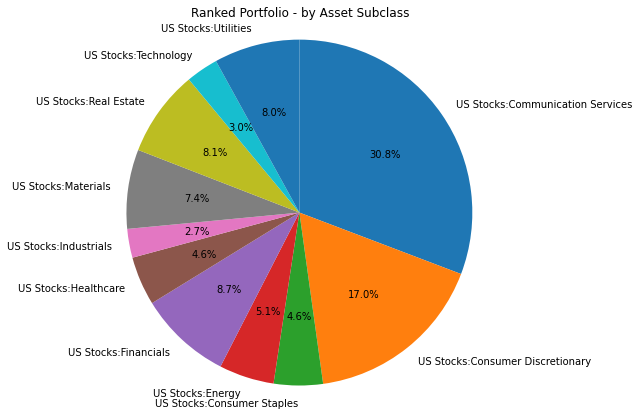

US Stocks:Communication Services   0.31
US Stocks:Consumer Discretionary   0.17
US Stocks:Consumer Staples         0.05
US Stocks:Energy                   0.05
US Stocks:Financials               0.09
US Stocks:Healthcare               0.05
US Stocks:Industrials              0.03
US Stocks:Materials                0.07
US Stocks:Real Estate              0.08
US Stocks:Technology               0.03
US Stocks:Utilities                0.08



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    WTRG                           0.0801
    LSCC                           0.0302
    NSA                            0.0808
    RS                             0.0740
    CAR                            0.0269
    OPCH                           0.0457
    KNSL                           0.0869
    RRC                            0.0515
    DAR                            0.0459
    MUSA                           0.1703
    TGNA                           0.3078


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer.........

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.66
    annual_return              44.72
    std_dev                    26.93
    worst typical down year    -9.15
    black_swan                -36.08


Ranked Portfolio Weights:
    WTRG                           0.0000
    LSCC                           0.0000
    NSA                            0.2700
    RS                             0.0000
    CAR                            0.0000
    OPCH                           0.0800
    KNSL                           0.0500
    RRC                            0.0000
    DAR                            0.2900
    MUSA                           0.2700
    TGNA                           0.0400



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).